In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2] = 31
idx_small[5] = 32
idx_small[7] = 35
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
y_test[idx_small]

array([9, 2, 8, 1, 6, 3, 4, 0, 5, 7], dtype=uint8)

In [3]:
sp_o = 0.05
sp_w = 0.005
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_05_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_infoGAN/')

In [4]:
AE.decoder.layers

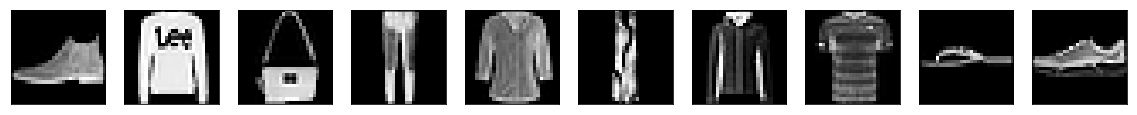

In [17]:
bastien_utils.plot_all_images(x_small)

In [18]:
x_small_rec = AE.reconstruction(x_small)

In [20]:
x_test_rec = AE.reconstruction(x_test)

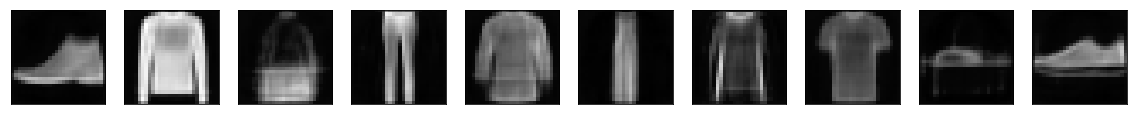

In [19]:
bastien_utils.plot_all_images(x_small_rec)

In [22]:
print("MSE without cropping: ", np.mean(np.square(x_test_rec - x_test)))

MSE without cropping:  0.011798583


In [23]:
x_test_rec_clipped = np.clip(x_test_rec, 0, 1)

In [39]:
print("MSE after clipping: ", np.mean(np.square(x_test_rec_clipped - x_test)))

MSE after clipping:  0.011660315


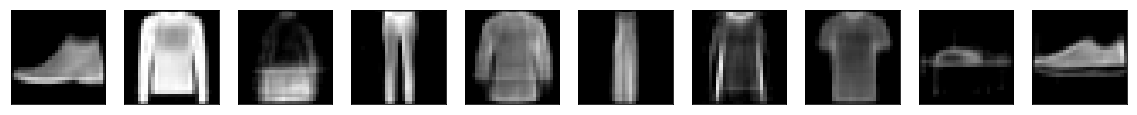

In [25]:
bastien_utils.plot_all_images(x_test_rec_clipped[idx_small])

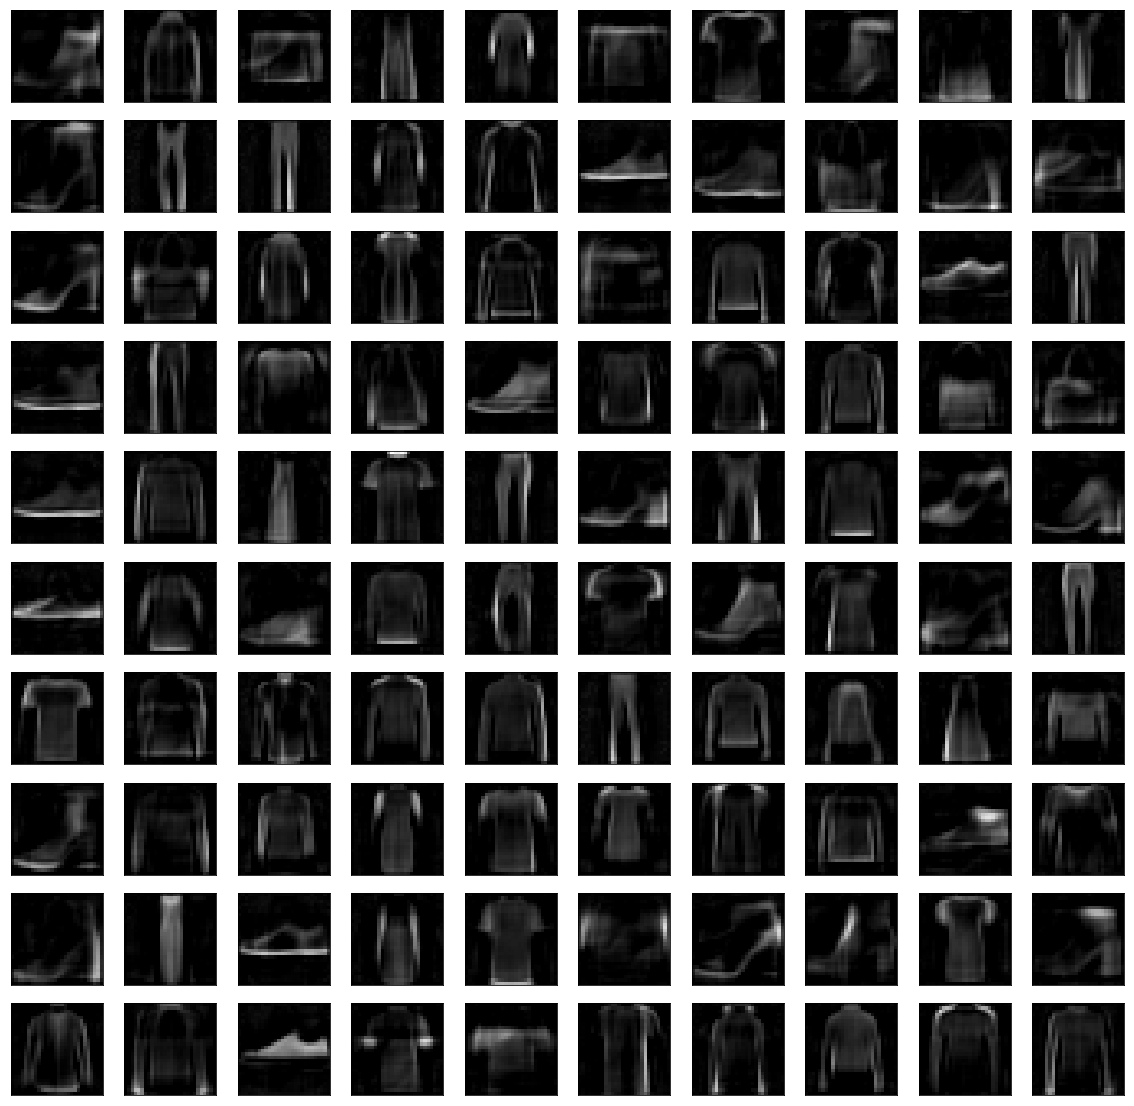

In [26]:
AE.plot_atoms_decoder()

In [27]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

In [28]:
max_approx_x_test = AE_dil.reconstruction(x_test)

In [31]:
np.min(max_approx_x_test)

-0.034247976

In [30]:
np.max(max_approx_x_test)

2.7321124

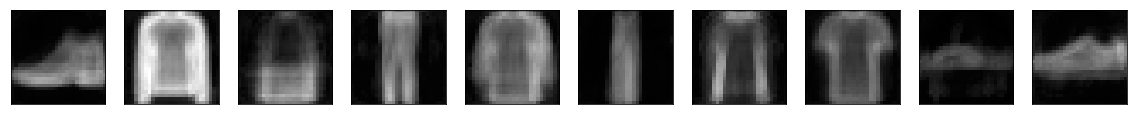

In [33]:
bastien_utils.plot_all_images(max_approx_x_test[idx_small])

In [34]:
max_approx_x_test_clipped = np.clip(max_approx_x_test, 0, 1)

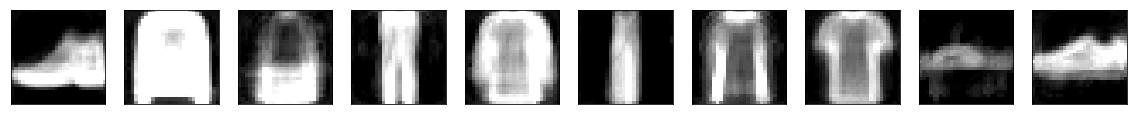

In [38]:
bastien_utils.plot_all_images(max_approx_x_test_clipped[idx_small])

In [40]:
x_test_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

In [41]:
print("MSE without clipping: ", np.mean(np.square(max_approx_x_test - x_test_dil)))

MSE without clipping:  0.10324171085058366


In [42]:
print("MSE without clipping: ", np.mean(np.square(max_approx_x_test_clipped - x_test_dil)))

MSE without clipping:  0.0355854764040008


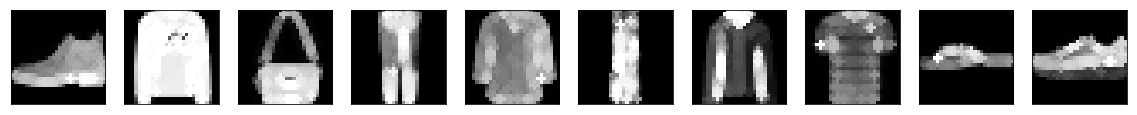

In [43]:
bastien_utils.plot_all_images(x_test_dil[idx_small])

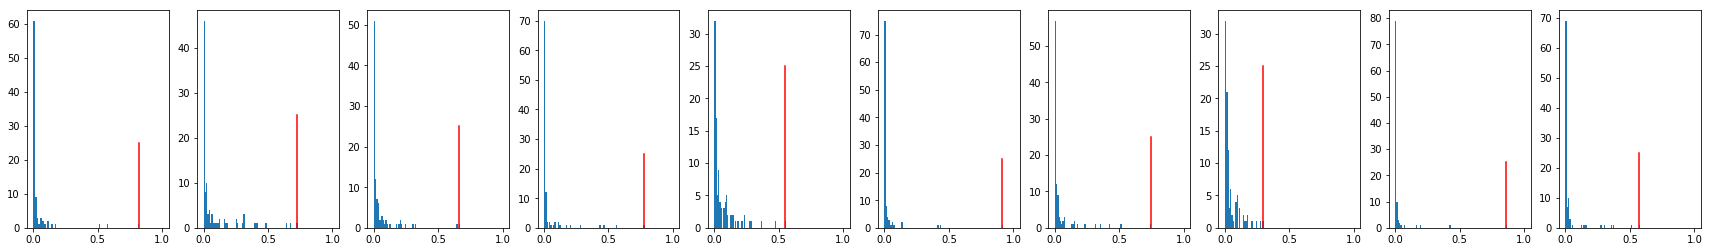

In [44]:
AE.plot_histograms_of_the_encoding(x_small)

In [4]:
AE.sparsity_measure(x_test)

0.6148549

## Alternative set of parameters - Chosen one !

In [4]:
sp_o = 0.05
sp_w = 0.0005
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_05_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/MNIST_Fashion/AsymAE_infoGAN/')

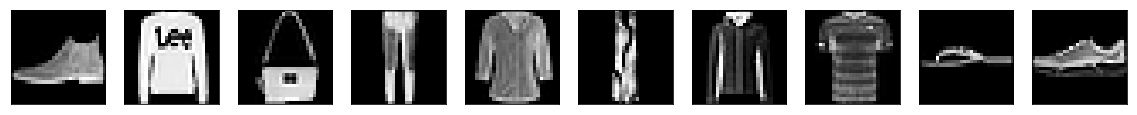

In [5]:
bastien_utils.plot_all_images(x_small)

In [6]:
x_small_rec = AE.reconstruction(x_small)

In [7]:
x_test_rec = AE.reconstruction(x_test)

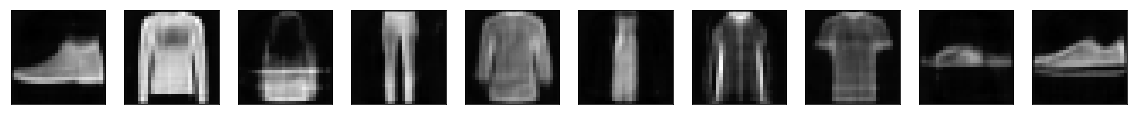

In [8]:
bastien_utils.plot_all_images(x_small_rec)

In [9]:
print("MSE without clipping: ", np.mean(np.square(x_test_rec - x_test)))

MSE without clipping:  0.010318611


In [10]:
x_test_rec_clipped = np.clip(x_test_rec, 0, 1)

In [11]:
print("MSE after clipping: ", np.mean(np.square(x_test_rec_clipped - x_test)))

MSE after clipping:  0.010161893


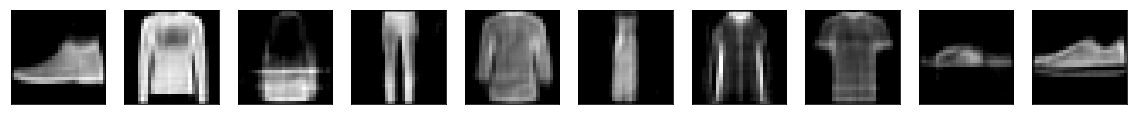

In [12]:
bastien_utils.plot_all_images(x_test_rec_clipped[idx_small])

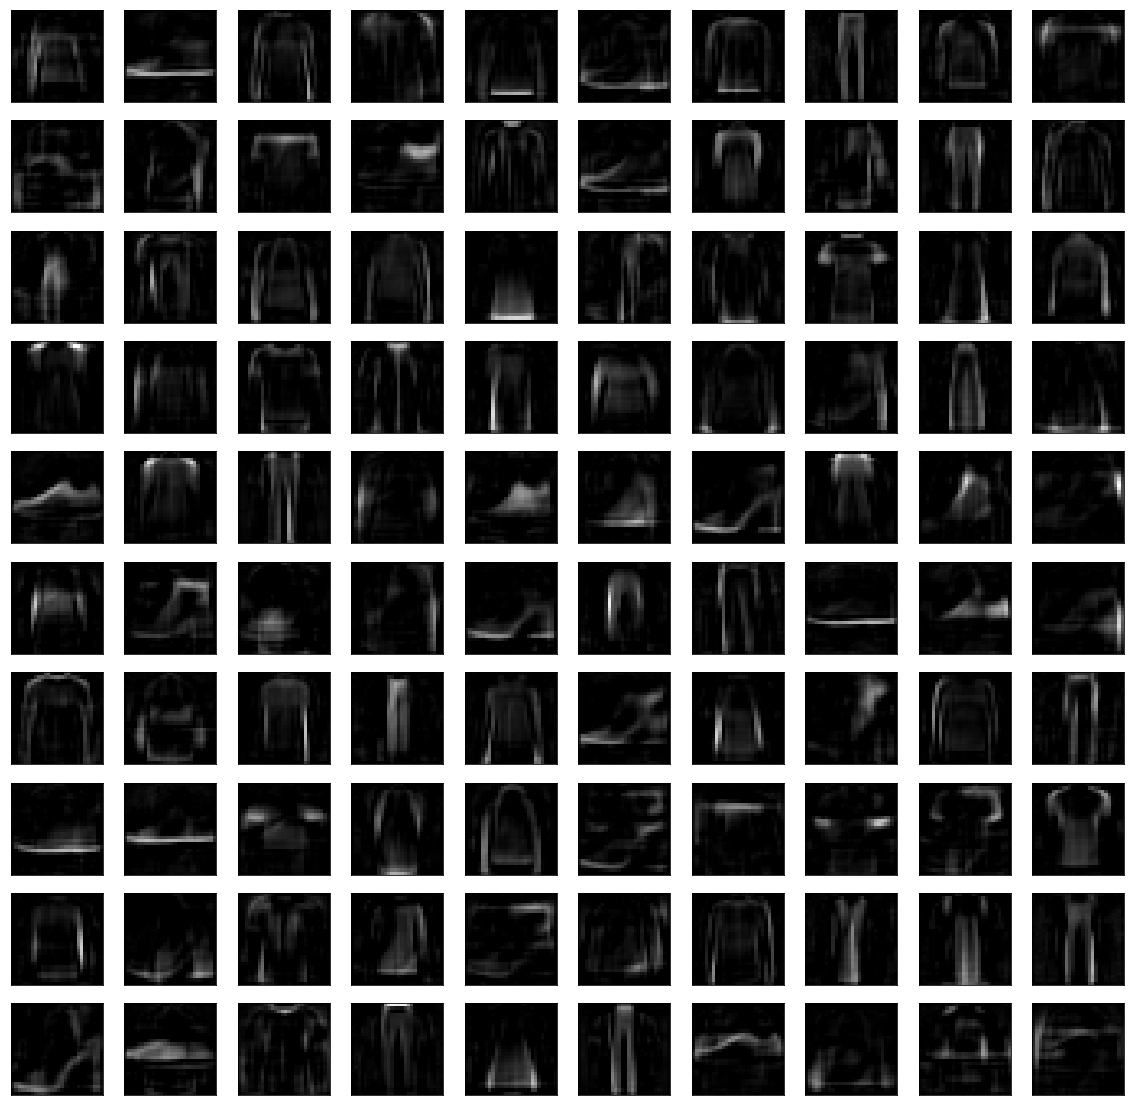

In [13]:
AE.plot_atoms_decoder()

In [14]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)

In [15]:
max_approx_x_test = AE_dil.reconstruction(x_test)

In [16]:
np.min(max_approx_x_test)

-0.03991869

In [17]:
np.max(max_approx_x_test)

2.9846733

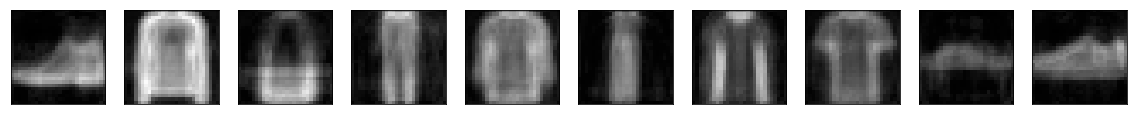

In [18]:
bastien_utils.plot_all_images(max_approx_x_test[idx_small])

In [19]:
max_approx_x_test_clipped = np.clip(max_approx_x_test, 0, 1)

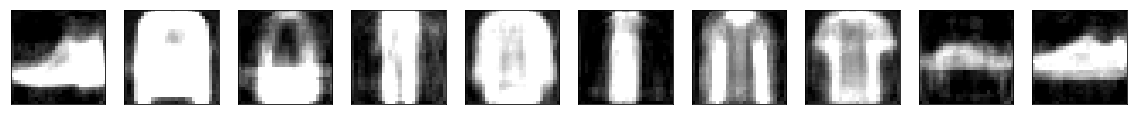

In [20]:
bastien_utils.plot_all_images(max_approx_x_test_clipped[idx_small])

In [21]:
x_test_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

In [22]:
print("MSE without clipping: ", np.mean(np.square(max_approx_x_test - x_test_dil)))

MSE without clipping:  0.2342903782465863


In [23]:
print("MSE after clipping: ", np.mean(np.square(max_approx_x_test_clipped - x_test_dil)))

MSE after clipping:  0.06607925213443856


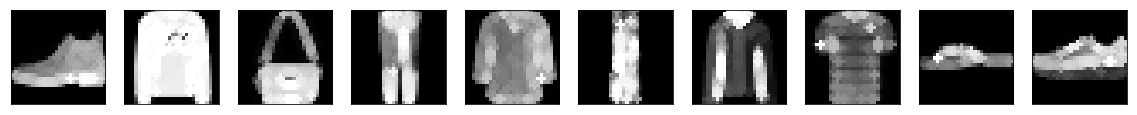

In [43]:
bastien_utils.plot_all_images(x_test_dil[idx_small])

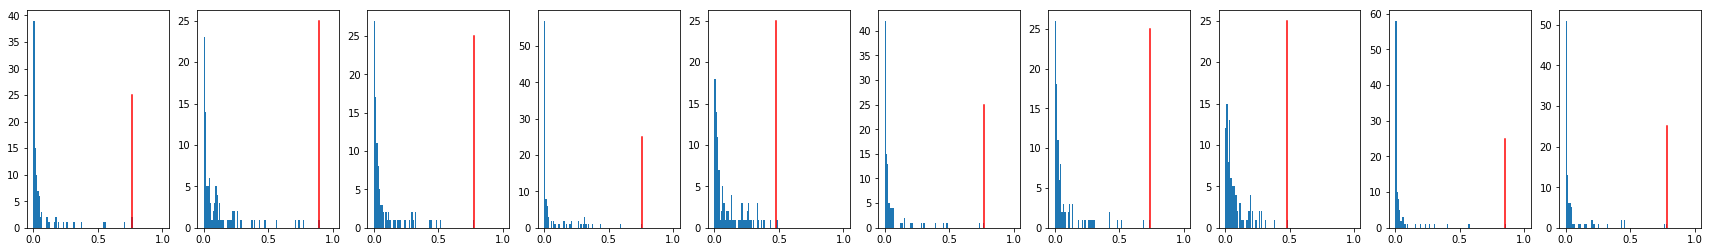

In [24]:
AE.plot_histograms_of_the_encoding(x_small)

In [25]:
AE.sparsity_measure(x_test)

0.5175786